In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd

# Load the training data
train_df = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv')

# Display the shape of the dataframe
print("Shape of the dataframe:", train_df.shape)

# Display the first 10 rows of the dataframe
print("First 10 rows of the dataframe:")
print(train_df.head(1461))

# Optionally, to display a random sample of 10 rows
print("Random sample of 1461 rows:")
print(train_df.sample(1460))

# Optionally, display specific columns
print("First 1461 rows of specific columns:")
print(train_df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']].head(1461))



Shape of the dataframe: (1460, 81)
First 10 rows of the dataframe:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   N

In [6]:
# Select relevant columns
columns = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']
df = train_df[columns]

# Check for missing values
missing_values = df.isnull().sum()

missing_values


GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
SalePrice       0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Split the data into training and validation sets
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
y = df['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_pred)

mae


36018.563138363446

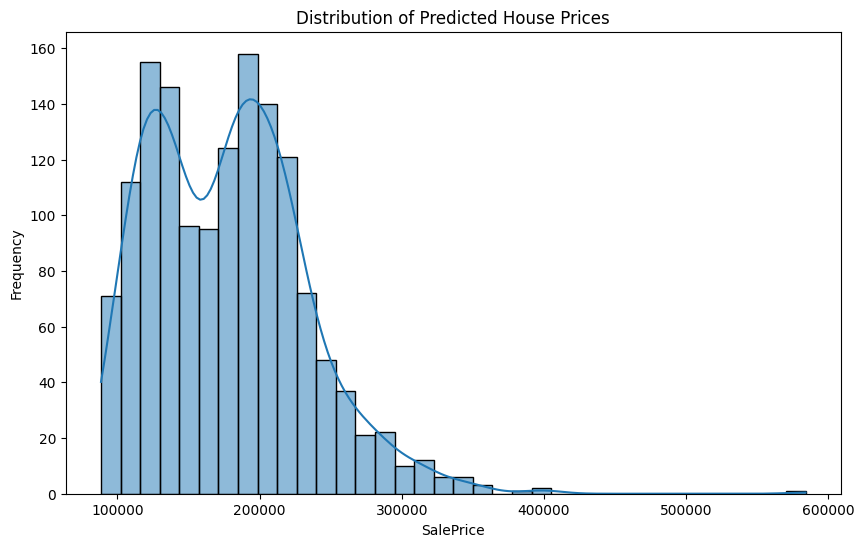

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the training data
train_df = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv')

# Select relevant columns for training
columns = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']
df = train_df[columns]

# Split the data into training and validation sets
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
y = df['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Load the test data
test_df = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv')

# Select relevant columns for prediction
X_test = test_df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]

# Make predictions
test_pred = model.predict(X_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_pred
})

# Save the submission file
submission.to_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/sample_submission.csv', index=False)

# Plot the distribution of predicted house prices
plt.figure(figsize=(10, 6))
sns.histplot(test_pred, kde=True)
plt.title('Distribution of Predicted House Prices')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# You cannot plot predicted vs. actual prices because the test set does not contain actual prices.
# If you want to evaluate your model's performance, you should use the validation set (X_val, y_val) instead.

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the test data
test_df = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv')

# Select relevant columns for prediction
X_test = test_df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]

# Assuming you have trained your model already
model = LinearRegression()
model.fit(X_train, y_train)  # Ensure X_train and y_train are defined as shown earlier

# Make predictions
test_pred = model.predict(X_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_pred
})

# Save the submission file
submission.to_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/sample_submission.csv', index=False)

# Display the saved submission file
saved_submission = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/sample_submission.csv')
print(saved_submission.head())

<function read_csv at 0x78776ea94820>
     Id      SalePrice
0  1461  121423.030985
1  1462  143380.870622
2  1463  204748.668874
3  1464  202205.354725
4  1465  191336.364775


In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the training data
train_df = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv')

# Select relevant columns
columns = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']
df = train_df[columns]

# Split the data into training and validation sets
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
y = df['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Load the test data
test_df = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv')

# Select relevant columns for prediction
X_test = test_df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]

# Make predictions
test_pred = model.predict(X_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_pred
})

# Save the submission file
submission_file_path = '/content/drive/MyDrive/house-prices-advanced-regression-techniques/sample_submission.csv'
submission.to_csv(submission_file_path, index=False)

# Display the saved submission file
saved_submission = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/sample_submission.csv')

# Print the shape to confirm the number of rows and columns
print("Shape of the submission file:", saved_submission.shape)

# Display the first few rows to verify
print(saved_submission.head(1444))


Shape of the submission file: (1459, 2)
        Id      SalePrice
0     1461  121423.030985
1     1462  143380.870622
2     1463  204748.668874
3     1464  202205.354725
4     1465  191336.364775
...    ...            ...
1439  2900  157511.070484
1440  2901  198129.385699
1441  2902  203849.470385
1442  2903  233810.494934
1443  2904  221399.121890

[1444 rows x 2 columns]
